# Projective distortion

(204, 341, 4)
[[ 1.25421050e+00 -1.28417169e-01  6.54000000e+02]
 [ 9.32738055e-02  1.00887090e+00  1.10000000e+02]
 [ 2.91126592e-04 -2.24962024e-04  1.00000000e+00]]


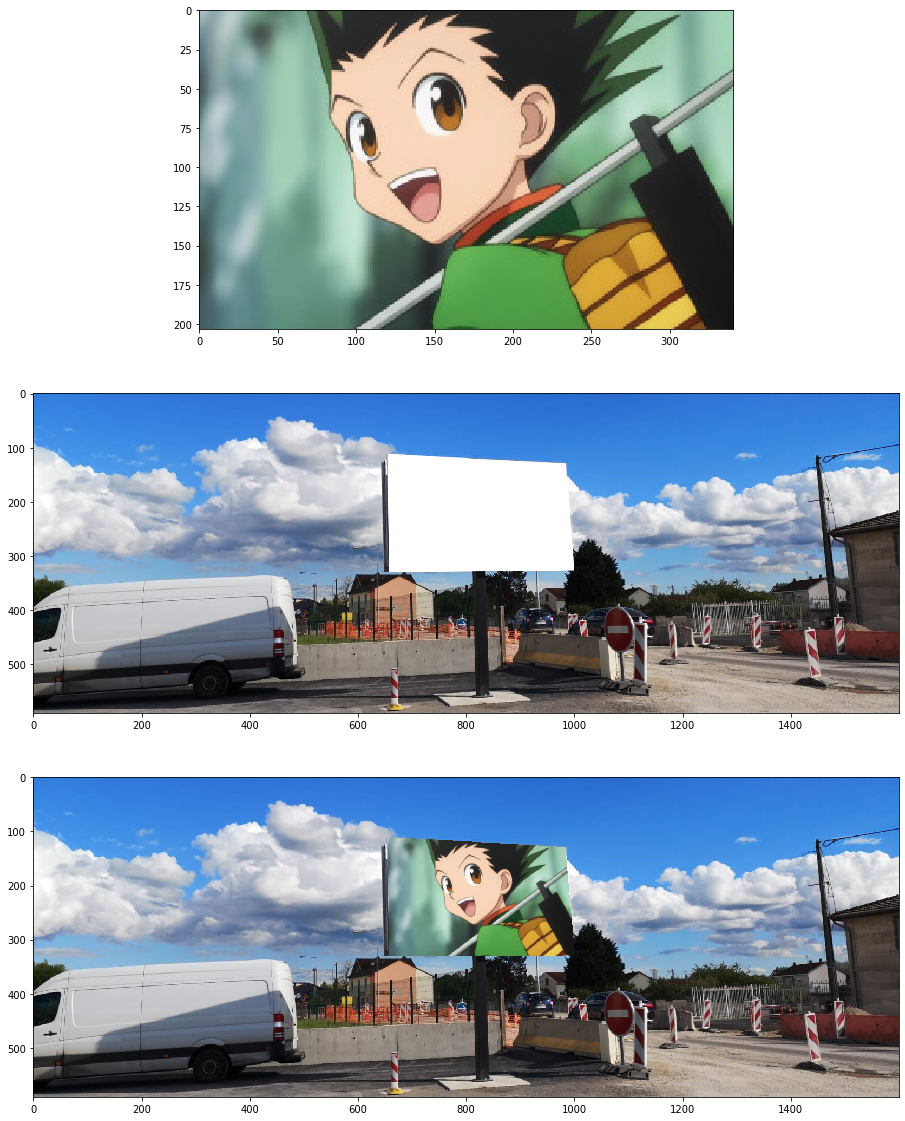

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


bgr_target = cv2.imread('./pictures/publicitaire_banner.jpg')
bgr_target = cv2.cvtColor(bgr_target, cv2.COLOR_BGR2BGRA)
rgb_target = cv2.cvtColor(bgr_target, cv2.COLOR_BGRA2RGBA)

bgr_gon = cv2.imread('./pictures/gon_landscape.jpg')
bgr_gon = cv2.cvtColor(bgr_gon, cv2.COLOR_BGR2BGRA)
rgb_gon = cv2.cvtColor(bgr_gon, cv2.COLOR_BGRA2RGBA)

result = bgr_target.copy()

print(rgb_gon.shape)
srcCornerList= np.array([
    [0,0], #top left corner
    [0,bgr_gon.shape[0]], #bottom left corner
    [bgr_gon.shape[1],0], # top right corner
    [bgr_gon.shape[1],bgr_gon.shape[0]] # bottom right corner
],np.float32)

dest2CornerList = np.array([
    [654,110], # top left corner
    [658,331], # bottom left corner
    [984,129], # top right corner
    [1002,330] # bottom right corner
],np.float32)


transform = cv2.getPerspectiveTransform(srcCornerList,dest2CornerList)
print(transform)
cv2.warpPerspective(src=bgr_gon,dst=bgr_target,M=transform,dsize = (bgr_target.shape[1],bgr_target.shape[0]), borderMode=cv2.BORDER_TRANSPARENT)
rgb_target = cv2.cvtColor(bgr_target, cv2.COLOR_BGRA2RGBA)
rgb_result = cv2.cvtColor(result, cv2.COLOR_BGRA2RGBA)

fig = plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.imshow(rgb_gon) 
plt.subplot(3,1,2)
plt.imshow(rgb_result)
plt.subplot(3,1,3)
plt.imshow(rgb_target)
plt.show()

# SIFT and Image stitching

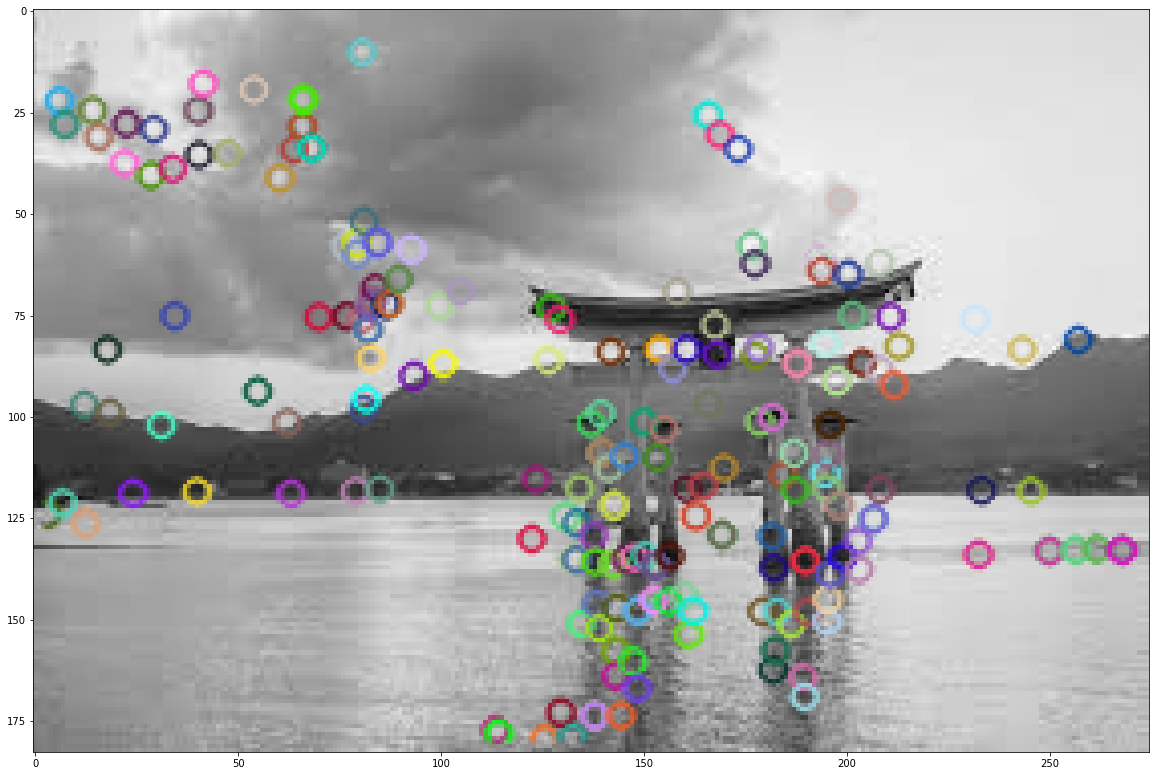

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('./pictures/tori.jpeg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

fig = plt.figure(figsize=(20, 20))
plt.imshow(img)

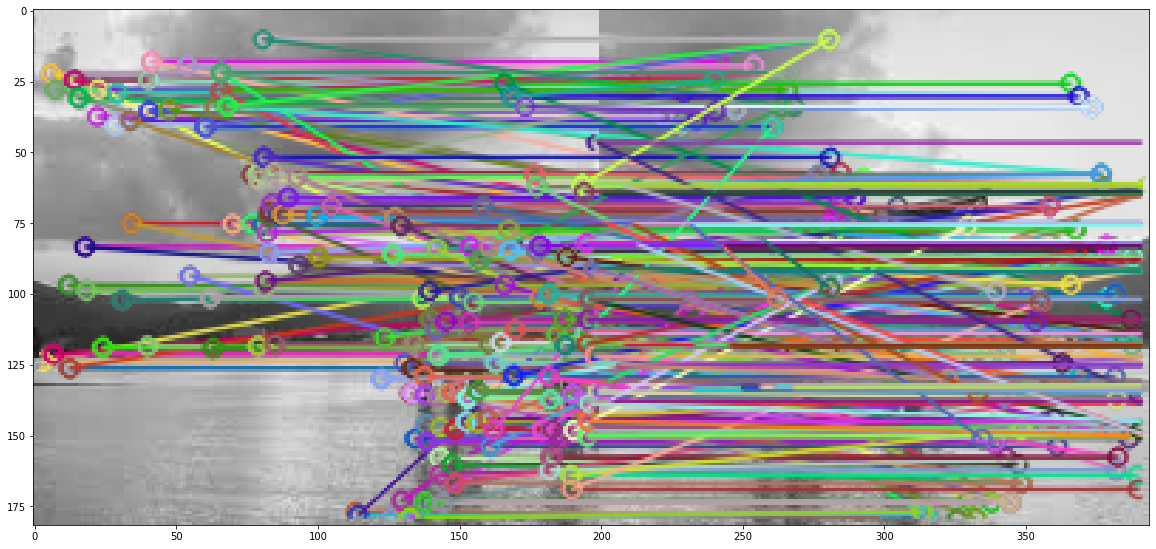

In [70]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('./pictures/tori.jpeg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cropLeftImg = gray.copy()
cropRightImg = gray.copy()

cropLeftImg = cropLeftImg[0:cropLeftImg.shape[0]-1,80:cropLeftImg.shape[1]-1]
cropRightImg = cropRightImg[0:cropRightImg.shape[0]-1,0:200]


siftLeft = cv.xfeatures2d.SIFT_create()
siftRight = cv.xfeatures2d.SIFT_create()


kpLeft,descriptorLeft = siftLeft.detectAndCompute(gray,None)
kpRight,descriptorRight = siftRight.detectAndCompute(gray,None)

bfMatcher = cv.BFMatcher()

matches = bfMatcher.knnMatch(descriptorRight,descriptorLeft,k=2)

good = [m,n for m,n in matchesF]
#cropLeftImg=cv.drawKeypoints(cropLeftImg,kpLeft,cropLeftImg)
#cropRightImg=cv.drawKeypoints(cropRightImg,kpRight,cropRightImg)

matchesDrawImg = cv.drawMatchesKnn(cropRightImg,kpRight,cropLeftImg,kpLeft,matches,None,flags= cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#plt.subplot(3,1,1)
#plt.imshow(cropRightImg)
#plt.subplot(3,1,2)
#plt.imshow(cropLeftImg)

fig = plt.figure(figsize=(20, 20))
plt.imshow(matchesDrawImg)

#warpPerspective 
#getPerspectiveTransform

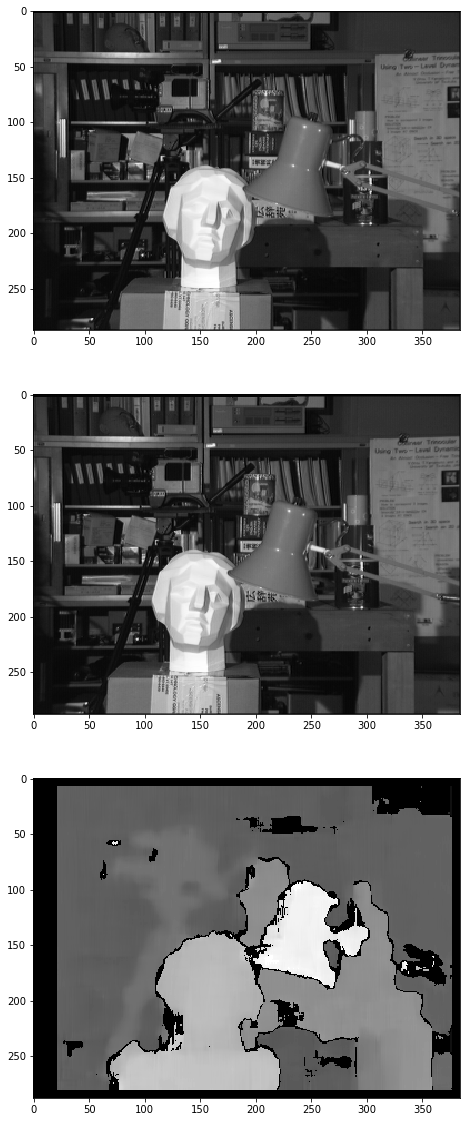

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

bgr_image_left = cv2.imread('image_left')
bgr_image_left = cv2.cvtColor(bgr_image_left, cv2.COLOR_BGR2BGRA)
rgb_image_left = cv2.cvtColor(bgr_image_left, cv2.COLOR_BGRA2RGBA)
gl = cv2.cvtColor(rgb_image_left, cv2.COLOR_RGB2GRAY)

bgr_image_right = cv2.imread('image_right')
bgr_image_right = cv2.cvtColor(bgr_image_right, cv2.COLOR_BGR2BGRA)
rgb_image_right = cv2.cvtColor(bgr_image_right, cv2.COLOR_BGRA2RGBA)
gr = cv2.cvtColor(rgb_image_right, cv2.COLOR_RGB2GRAY)

stereo = cv2.StereoBM_create(16, 15)
disparity = stereo.compute(gl, gr)

fig = plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.imshow(gl, 'gray') 
plt.subplot(3,1,2)
plt.imshow(gr, 'gray') 
plt.subplot(3,1,3)
plt.imshow(disparity, 'gray') 
plt.show()